In [22]:
!cd /results/glioma_infer && ls

fold-0_brats  fold-0_brats_brain  fold-1_brats_brain


In [2]:
# !cd /data/private_data/15_3d && ls

In [4]:
import numpy as np
check = np.load('/data/private_data/15_3d/1019_18_x.npy')
# 1019_18_y.npy	')
print(check.shape)

(5, 140, 159, 142)


In [5]:
check = np.load('/data/private_data/15_3d/1019_18_y.npy')
# 1019_18_y.npy	')
print(check.shape)

(1, 140, 159, 142)


In [7]:
import pickle


with open('/data/private_data/15_3d/config.pkl', 'rb') as f:
    data = pickle.load(f)

In [8]:
data

{'patch_size': [128, 128, 128],
 'spacings': [1.0, 1.0, 1.0],
 'n_class': 2,
 'in_channels': 5}

In [ ]:
!export CUDA_VISIBLE_DEVICES=1 && python ../main.py --no_back_in_output --data /data/private_data/15_3d --results /results/glioma_results/finetune/fold-2 --resume_training --ckpt_path /home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/results/last.ckpt --deep_supervision --depth 6 --filters 64 96 128 192 256 384 512 --min_fmap 2 --scheduler --learning_rate 0.0003 --epochs 150 --nfolds 3 --fold 2 --amp --gpus 1 --task 15 --save_ckpt

Global seed set to 1
185 training, 92 validation, 277 test examples
Filters: [64, 96, 128, 192, 256, 384, 512],
Kernels: [[3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3]]
Strides: [[1, 1, 1], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2]]
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]

  | Name  | Type    | Params
----------------------------------
0 | model | DynUNet | 50.8 M
1 | loss  | Loss    | 0     
2 | dice  | Dice    | 0     
----------------------------------
50.8 M    Trainable params
0         Non-trainable params
50.8 M    Total params
203.356   Total estimated model params size (MB)
/opt/conda/lib/python3.8/site-packages/pytorch_lightning/trainer/callback_hook.py:307: LightningDeprecationWarning: `Callback.on_load_checkpoint` signature has changed in v1.3. `trainer` and `pl_module` parameters have been added. Support for the old s

In [85]:
!cd /results/glioma_results/finetune/fold-2/checkpoints/ && ls

'epoch=128-dice_mean=75.04.ckpt'   last.ckpt


In [87]:
!cd ../ && export CUDA_VISIBLE_DEVICES=0 && python main.py --brats --exec_mode predict --task 15 --data /data/private_data/15_3d --dim 3 --fold 2 --nfolds 3 --ckpt_path /results/glioma_results/finetune/fold-2/checkpoints/epoch=128-dice_mean=75.04.ckpt --results /results/glioma_infer/finetune --amp --tta --save_preds

Global seed set to 1
0 training, 0 validation, 277 test examples
Filters: [64, 96, 128, 192, 256, 384, 512],
Kernels: [[3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3]]
Strides: [[1, 1, 1], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2]]
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Testing: 100%|████████████████████████████████| 277/277 [24:13<00:00,  5.25s/it]
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


In [30]:
!cd /home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/results/3_fold_brats_2021/fold-1/checkpoints/ && ls

'epoch=118-dice_mean=91.05.ckpt'  'epoch=74-dice_mean=90.68.ckpt'
'epoch=146-dice_mean=90.84.ckpt'  'epoch=8-dice_mean=85.63.ckpt'
'epoch=21-dice_mean=87.99.ckpt'   'epoch=83-dice_mean=90.88.ckpt'
'epoch=31-dice_mean=89.29.ckpt'    last.ckpt
'epoch=38-dice_mean=89.48.ckpt'


In [9]:
import torch
avg = torch.load('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/results/3_fold_brats_2021/avarage_weights_all_dicts.ckpt')


In [21]:
for key in avg.keys():
    print(key)

epoch
global_step
pytorch-lightning_version
state_dict
callbacks
optimizer_states
lr_schedulers
native_amp_scaling_state
hparams_name
hyper_parameters


In [25]:
ch['state_dict']['model.skip_layers.next_layer.super_head.conv.conv.bias']

In [93]:
torch.Tensor([-0.0610, -0.1444])

tensor([-0.0610, -0.1444])

In [ ]:
model.skip_layers.next_layer.super_head.conv.conv.bias

In [135]:
torch.save(ch, 'last.ckpt')

In [23]:
ch = torch.load('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/results/last.ckpt')

In [24]:
ch['epoch']

0

In [25]:
for ech in ch['state_dict']:
    if ech in ['model.output_block.conv.conv.weight', 'model.output_block.conv.conv.bias', 'model.deep_supervision_heads.0.conv.conv.weight','model.deep_supervision_heads.0.conv.conv.bias', 
               'model.deep_supervision_heads.1.conv.conv.weight','model.deep_supervision_heads.1.conv.conv.bias', 
               'model.deep_supervision_heads.2.conv.conv.weight','model.deep_supervision_heads.2.conv.conv.bias',
               'model.deep_supervision_heads.3.conv.conv.weight','model.deep_supervision_heads.3.conv.conv.bias',
               'model.deep_supervision_heads.4.conv.conv.weight','model.deep_supervision_heads.4.conv.conv.bias',
              'model.skip_layers.next_layer.next_layer.next_layer.next_layer.next_layer.super_head.conv.conv.weight',
              'model.skip_layers.next_layer.next_layer.next_layer.next_layer.next_layer.super_head.conv.conv.bias',
              'model.skip_layers.next_layer.next_layer.next_layer.next_layer.super_head.conv.conv.weight',
              'model.skip_layers.next_layer.next_layer.next_layer.next_layer.super_head.conv.conv.bias',
              'model.skip_layers.next_layer.next_layer.next_layer.super_head.conv.conv.weight',
              'model.skip_layers.next_layer.next_layer.next_layer.super_head.conv.conv.bias',
              'model.skip_layers.next_layer.next_layer.super_head.conv.conv.weight',
              'model.skip_layers.next_layer.next_layer.super_head.conv.conv.bias',
              'model.skip_layers.next_layer.super_head.conv.conv.weight', 'model.skip_layers.next_layer.super_head.conv.conv.bias']:
        print(ech)
#         ch['state_dict'][ech]=ch['state_dict'][ech][:2]
#         ch['state_dict'][ech][[0,1]]=ch['state_dict'][ech][[1,0]]
#         ch['state_dict'][ech] = ch['state_dict'][ech][1]
        print(ch['state_dict'][ech].shape)
#     else:
#         print(ech)
#         print(ch['state_dict'][ech].shape)

model.output_block.conv.conv.weight
torch.Size([1, 64, 1, 1, 1])
model.output_block.conv.conv.bias
torch.Size([1])
model.deep_supervision_heads.0.conv.conv.weight
torch.Size([1, 96, 1, 1, 1])
model.deep_supervision_heads.0.conv.conv.bias
torch.Size([1])
model.deep_supervision_heads.1.conv.conv.weight
torch.Size([1, 128, 1, 1, 1])
model.deep_supervision_heads.1.conv.conv.bias
torch.Size([1])
model.deep_supervision_heads.2.conv.conv.weight
torch.Size([1, 192, 1, 1, 1])
model.deep_supervision_heads.2.conv.conv.bias
torch.Size([1])
model.deep_supervision_heads.3.conv.conv.weight
torch.Size([1, 256, 1, 1, 1])
model.deep_supervision_heads.3.conv.conv.bias
torch.Size([1])
model.deep_supervision_heads.4.conv.conv.weight
torch.Size([1, 384, 1, 1, 1])
model.deep_supervision_heads.4.conv.conv.bias
torch.Size([1])
model.skip_layers.next_layer.next_layer.next_layer.next_layer.next_layer.super_head.conv.conv.weight
torch.Size([1, 384, 1, 1, 1])
model.skip_layers.next_layer.next_layer.next_layer.next

In [98]:
ch['state_dict']['model.deep_supervision_heads.4.conv.conv.bias'].shape

torch.Size([1])

In [50]:
ch['state_dict']['model.deep_supervision_heads.4.conv.conv.bias'] = ch['state_dict']['model.deep_supervision_heads.4.conv.conv.bias'][0].unsqueeze(0)

In [123]:
test = ch['state_dict']['model.output_block.conv.conv.weight']

In [152]:
ch['optimizer_states'][0]['state'][90]['exp_avg_sq'] = ch['optimizer_states'][0]['state'][90]['exp_avg_sq'][0].unsqueeze(0)

In [134]:
# for ech in ch['optimizer_states'][0]['state'].keys():
#     for l in ch['optimizer_states'][0]['state'][ech].keys():
#         if ech >= 90:
#             print(ech), print(l)
#             ch['optimizer_states'][0]['state'][ech][l]=ch['optimizer_states'][0]['state'][ech][l][:2]
#             ch['optimizer_states'][0]['state'][ech][l][[0,1]]=ch['optimizer_states'][0]['state'][ech][l][[1,0]]
#             print(ch['optimizer_states'][0]['state'][ech][l].shape)

90
exp_avg
torch.Size([2, 64, 1, 1, 1])
90
exp_avg_sq
torch.Size([2, 64, 1, 1, 1])
91
exp_avg
torch.Size([2])
91
exp_avg_sq
torch.Size([2])
92
exp_avg
torch.Size([2, 96, 1, 1, 1])
92
exp_avg_sq
torch.Size([2, 96, 1, 1, 1])
93
exp_avg
torch.Size([2])
93
exp_avg_sq
torch.Size([2])
94
exp_avg
torch.Size([2, 128, 1, 1, 1])
94
exp_avg_sq
torch.Size([2, 128, 1, 1, 1])
95
exp_avg
torch.Size([2])
95
exp_avg_sq
torch.Size([2])


In [88]:
import os
import sys
import argparse
import numpy as np
import pandas as pd
import nibabel as nib    
from pathlib import Path
from surface_distance import metrics
from tqdm import tqdm



def sensitivity_and_specificity(mask_gt, mask_pred):
    """ Computes sensitivity and specificity
     sensitivity  = TP/(TP+FN)
     specificity  = TN/(TN+FP) """
    volume_sum = mask_gt.sum() + mask_pred.sum()
    tp = (mask_gt & mask_pred).sum()
    tn = (~mask_gt & ~mask_pred).sum()
    fp = (~mask_gt & mask_pred).sum()
    fn = (mask_gt & ~mask_pred).sum()
#     TP/(TP+FP) - precision; TP/(TP+FN) - recall
    return tp/(tp+fn), tp/(tp+fp), tn/(tn+fp)


def calculate_metrics_brats(true_mask, pred_mask, ids, spaces):
    """ Takes two file locations as input and validates surface distances.
    Be careful with dimensions of saved `pred` it should be 3D.
    
    """
    
    _columns = ['Ids', 'Dice_1', 'Dice_2', 
                'Hausdorff95_1', 'Hausdorff95_2',
               'Sensitivity_1', 'Sensitivity_2',
                'Specificity_1', 'Specificity_2',
                'Surface_dice_1', 'Surface_dice_2',
               'Precision_1', 'Precision_2']
    
    df = pd.DataFrame(columns = _columns)
    df.at[0,'Ids'] = ids
    #class 1
    distances = metrics.compute_surface_distances((true_mask==1), (pred_mask[0,:,:,:]==1), spaces)
    df.at[0,'Dice_1'] = metrics.compute_dice_coefficient((true_mask==1), (pred_mask[0,:,:,:]==1))
    df.at[0,'Surface_dice_1'] = metrics.compute_surface_dice_at_tolerance(distances,1)
    df.at[0,'Hausdorff95_1'] = metrics.compute_robust_hausdorff(distances, 95)
    sens, precision, spec = sensitivity_and_specificity((true_mask==1), (pred_mask[0,:,:,:]==1))
    df.at[0,'Sensitivity_1'] = sens
    df.at[0,'Precision_1'] = precision
    df.at[0,'Specificity_1'] = spec
    #class 2
    distances = metrics.compute_surface_distances((true_mask==0), (pred_mask[0,:,:,:]==0), spaces)
    df.at[0,'Dice_2'] = metrics.compute_dice_coefficient((true_mask==0), (pred_mask[0,:,:,:]==0))
    df.at[0,'Surface_dice_2'] = metrics.compute_surface_dice_at_tolerance(distances,1)
    df.at[0,'Hausdorff95_2'] = metrics.compute_robust_hausdorff(distances, 95)
    sens,precision, spec= sensitivity_and_specificity((true_mask==0), (pred_mask[0,:,:,:]==0))
    df.at[0,'Sensitivity_2'] = sens
    df.at[0,'Precision_2'] = precision
    df.at[0,'Specificity_2'] = spec
    #class 3
#     distances = metrics.compute_surface_distances((true_mask[2,:,:,:]==1), (pred_mask[2,:,:,:]==1), spaces)
#     df.at[0,'Dice_4'] = metrics.compute_dice_coefficient((true_mask[2,:,:,:]==1), (pred_mask[2,:,:,:]==1))
#     df.at[0,'Surface_dice_4'] = metrics.compute_surface_dice_at_tolerance(distances,1)
#     df.at[0,'Hausdorff95_4'] = metrics.compute_robust_hausdorff(distances, 95)
#     sens, precision, spec= sensitivity_and_specificity((true_mask[2,:,:,:]==1), (pred_mask[2,:,:,:]==1))
#     df.at[0,'Sensitivity_4'] = sens
#     df.at[0,'Precision_4'] = precision
#     df.at[0,'Specificity_4'] = spec
    return df

def get_stats(preds, target, class_idx):
        tp = torch.logical_and(preds == class_idx, target == class_idx).sum()
        fn = torch.logical_and(preds != class_idx, target == class_idx).sum()
        fp = torch.logical_and(preds == class_idx, target != class_idx).sum()
        return tp, fn, fp

    
def compute_stats_brats( p, y):
        scores = torch.zeros(3, device=p.device, dtype=torch.float32)
        p = (torch.sigmoid(p) > 0.5).int()
        y_wt, y_tc, y_et = y > 0, ((y == 1) + (y == 3)) > 0, y == 3
        y = torch.stack([y_wt, y_tc, y_et], dim=1)

        for i in range(3):
            p_i, y_i = p[:, i], y[:, i]
            if (y_i != 1).all():
                # no foreground class
                scores[i - 1] += 1 if (p_i != 1).all() else 0
                continue
            tp, fn, fp = get_stats(p_i, y_i, 1)
            denom = (2 * tp + fp + fn).to(torch.float)
            score_cls = (2 * tp).to(torch.float) / denom if torch.is_nonzero(denom) else 0.0
            scores[i - 1] += score_cls
        return scores
    
def calculate_metrics(path_to_pred, path_to_target, spaces = True, name_csv='dice_metrics.csv', path_csv_all = '/home/polina/glioma/all_dice_metrics.csv'  ):
    
    """ 
    - path_to_pred - path to folder with predict subjects
    - path_to_target - path to folder with target subjects
    - name_pred - name for prediction, ex -brainTumorMask_SRI.nii.gz
    - name_target - name for targets, ex -GTV_to_SRI.nii.gz
    - spaces - if false - [1,1,1]
    - name_csv - name files for each subjects
    - path_csv_all - path to the main file with metrics for each subjects
    """
    _columns = ['Ids', 'Dice_1', 'Dice_2',
               'Hausdorff95_1', 'Hausdorff95_2',
               'Sensitivity_1', 'Sensitivity_2',
                'Specificity_1', 'Specificity_2',
                'Surface_dice_1', 'Surface_dice_2',
                'Precision_1', 'Precision_2']
    af_all = pd.DataFrame(columns = _columns)
    pred_folder = Path(path_to_pred)
    target_folder = Path(path_to_target)
    label = os.listdir(target_folder)
    label = [l.split('/')[-1][:-11] for l in label]
    for ids in tqdm(os.listdir(pred_folder)):
        sub = ids[:-4]
        if sub in label:
            targets = nib.load(target_folder /  f'{sub}_seg.nii.gz').get_fdata()
#         y_wt, y_tc, y_et = targets > 0, ((targets == 1) + (targets == 3)) > 0, targets == 3
#         targets = np.stack([y_wt, y_tc, y_et], axis=0).astype(int)
        
            predictions = np.load((os.path.join(path_pred, ids)))
            spaces = [1,1,1]
            pred = np.round(predictions, 0)
            pred = np.transpose(pred, (0, 3, 2, 1))
    #         print(targets.shape), print(pred.shape)
    #         print(np.unique(targets)), print(np.unique(pred))
            df=calculate_metrics_brats(targets.astype('int'), pred.astype('int'), sub, spaces)
    #         print(df)
            af_all = af_all.append(df)
        else:
            continue
    af_all.to_csv('all_metris_glioma_finetune_fold2.csv')  
    print(af_all.mean())

In [90]:
path_pred='/results/glioma_infer/finetune/predictions_epoch=128-dice_mean=75_04_task=15_fold=2_tta'
path_target='/data/private_data/brats_pipeline_out_train_GTV_brain/labels'
calculate_metrics(path_pred, path_target)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 277/277 [18:15<00:00,  3.95s/it]

Dice_1             0.786366
Dice_2             0.998270
Hausdorff95_1     11.174389
Hausdorff95_2      0.512620
Sensitivity_1      0.820681
Sensitivity_2      0.998140
Specificity_1      0.998140
Specificity_2      0.820681
Surface_dice_1     0.467409
Surface_dice_2     0.975246
Precision_1        0.792144
Precision_2        0.998405
dtype: float64


In [89]:
!cd /results/glioma_infer/finetune && ls

 fold-0
'predictions_epoch=128-dice_mean=75_04_task=15_fold=2_tta'
'predictions_epoch=145-dice_mean=75_39_task=15_fold=0_tta'
'predictions_epoch=149-dice_mean=76_95_task=15_fold=1_tta'


1019_18
(4, 3)
(240, 240)
(240, 240, 155, 1)
[0. 1.]
[0 1]


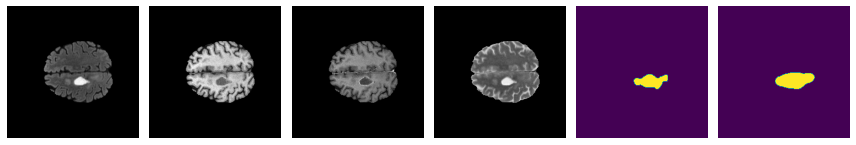

102_19_4
(4, 3)
(240, 240)
(240, 240, 155, 1)
[0. 1.]
[0 1]


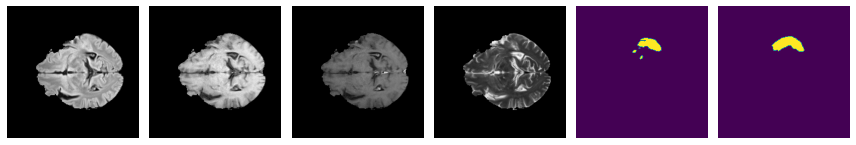

1032_19
(4, 3)
(240, 240)
(240, 240, 155, 1)
[0. 1.]
[0 1]


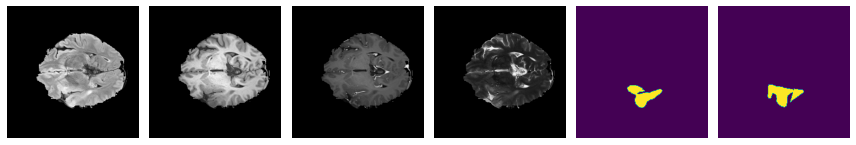

1034_18_4
(4, 3)
(240, 240)
(240, 240, 155, 1)
[0. 1.]
[0 1]


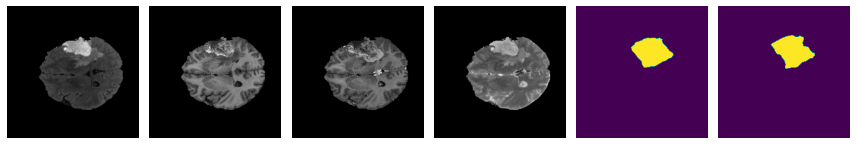

1036_18
(4, 3)
(240, 240)
(240, 240, 155, 1)
[0. 1.]
[0 1]


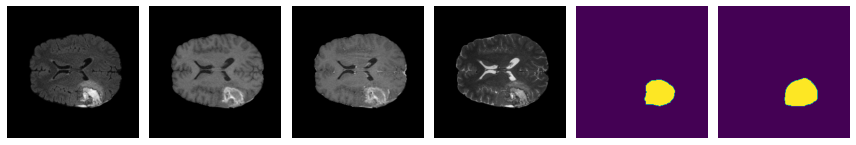

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob

n, z = 5, 110
data = sorted(glob("/results/glioma_infer/finetune/predictions_epoch=145-dice_mean=75_39_task=15_fold=0_tta/*.npy"))
for i, z in zip([0,2,3,4,5,6],[110,65,65,65, 80]):
    fname = data[i].split("/")[-1].split(".")[0]
    print(fname)
    meta = np.load(f'/data/private_data/15_3d/{fname}_meta.npy')
#     print(meta)
#     meta = np.load(f'/data/private_data/15_3d/{fname}_x.npy')
    print(meta.shape)
    img = nib.load(f"/data/private_data/brats_pipeline_out_train_GTV_brain/images/{fname}.nii.gz").get_fdata().astype(np.float32)
    label = nib.load(f"/data/private_data/brats_pipeline_out_train_GTV_brain/labels/{fname}_seg.nii.gz").get_fdata().astype(np.uint8)[:, :, z]
    pred = np.load(data[i])
#     pred = to_lbl(np.round(pred, 0))[:, :, z]
    pred = np.round(pred, 0).transpose(3,2,1,0)
    print(label.shape), print(pred.shape)
    print(np.unique(pred)), print(np.unique(label))
    imgs = [img[:, :, z, i] for i in [0, 1, 2, 3]] + [pred[:, :, z, 0]] + [label]
    fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 12))
    for i in range(6):
        if i < 4:
            ax[i].imshow(imgs[i], cmap='gray')
        else:
            ax[i].imshow(imgs[i]);
        ax[i].axis('off')  
    plt.tight_layout()            
    plt.show()